# Definition of problem (as per given problem statement with additional views)
- Ola is India’s largest mobility platform and one of the world’s largest ride-hailing companies, serving 250+ cities across India, Australia, New Zealand, and the UK. The Ola app offers mobility solutions by connecting customers to drivers and a wide range of vehicles across bikes, auto-rickshaws, metered taxis, and cabs, enabling convenience and transparency for hundreds of millions of consumers and over 1.5 million driver-partners.
- As Ola depends on the active drivers that they have in their services, they would like the retention rates to be high. The cost of acquiring new drivers is extremely high compared to keeping the drivers in their service as is. 
- They are currently facing a high churn rate and would like to understand the factors affecting the drivers leaving their services either permanently or to another cab-hailing service.
- They would also like to predict if a driver is leaving as they can take preventive action to retain the driver.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'ola_driver_scaler.csv')

# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [3]:
data.shape

(19104, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
#Dropping the first column as it's just an index
data = data.iloc[:,1:]

In [8]:
data.isna().sum()
# Last working days are have most blanks. This could be because the drivers haven't left yet.

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [9]:
data['Driver_ID'].nunique()

2381

In [10]:
data['Driver_ID'].value_counts()

Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64

In [11]:
data[data['Driver_ID'] == 2617]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
17912,01/01/19,2617,37.0,1.0,C25,0,104128,16/01/15,NaN,2,4,547260,2
17913,02/01/19,2617,37.0,1.0,C25,0,104128,16/01/15,NaN,2,4,237670,2
17914,03/01/19,2617,37.0,1.0,C25,0,104128,16/01/15,NaN,2,4,4898150,2
17915,04/01/19,2617,37.0,1.0,C25,0,104128,16/01/15,NaN,2,4,498020,2
17916,05/01/19,2617,37.0,1.0,C25,0,104128,16/01/15,NaN,2,4,310400,2
17917,06/01/19,2617,38.0,1.0,C25,0,104128,16/01/15,NaN,2,4,116510,2
17918,07/01/19,2617,38.0,1.0,C25,0,104128,16/01/15,NaN,2,4,810720,1
17919,08/01/19,2617,38.0,1.0,C25,0,104128,16/01/15,NaN,2,4,0,1
17920,09/01/19,2617,38.0,1.0,C25,0,104128,16/01/15,NaN,2,4,420440,1
17921,10/01/19,2617,38.0,1.0,C25,0,104128,16/01/15,NaN,2,4,474520,2


- We see that for a single driver, we have data across reporting months
- As this data is going to be used to find out if a driver is churned or not, we get the data to be at the level of driver_id

In [12]:
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'], format='%m/%d/%y')

In [13]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], format='%d/%m/%y')

# Feature Engineering Steps:

Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [14]:
data['Quarter'] = "Q" + data['MMM-YY'].dt.quarter.map({1:4,2:1,3:2,4:3}).astype(str)
data['FY'] = np.where(data['MMM-YY'].dt.month>3, data['MMM-YY'].dt.year,data['MMM-YY'].dt.year - 1)
data['QFY'] = data['Quarter'] + data['FY'].astype(str)
data.drop(['Quarter','FY'],axis=1, inplace=True)

In [15]:
quarterly = data.groupby(['Driver_ID', 'QFY'],as_index=False)['Quarterly Rating'].mean()
quarterly.sort_values(by=['Driver_ID', 'QFY'], inplace=True)
quarterly['Next_Quarter_Rating'] = quarterly.groupby('Driver_ID')['Quarterly Rating'].shift(-1).fillna(0)
quarterly['Immediate_Rating_Increase'] = (quarterly['Next_Quarter_Rating'] > quarterly['Quarterly Rating']).astype(int)


In [16]:
last_two_quarters = quarterly.groupby('Driver_ID').tail(2)
last_two_quarters['Last_Two_Quarters_Increase_Flag'] = (
    last_two_quarters['Next_Quarter_Rating'] > last_two_quarters['Quarterly Rating']
).astype(int)

quarterly = pd.merge(quarterly, last_two_quarters[['Driver_ID', 'QFY', 'Last_Two_Quarters_Increase_Flag']],
              on=['Driver_ID', 'QFY'], how='left')

quarterly['Last_Two_Quarters_Increase_Flag'] = quarterly['Last_Two_Quarters_Increase_Flag'].fillna(0)

In [17]:
driverRating = quarterly.groupby('Driver_ID',as_index=False)[['Immediate_Rating_Increase', 'Last_Two_Quarters_Increase_Flag']].sum()

In [18]:
monthly = data.groupby(['Driver_ID', 'MMM-YY'],as_index=False)['Income'].mean()
monthly.sort_values(by=['Driver_ID', 'MMM-YY'], inplace=True)
monthly['Next_Income'] = monthly.groupby('Driver_ID')['Income'].shift(-1)
monthly['Immediate_Income_Increase'] = (monthly['Next_Income'] > monthly['Income']).astype(int)

In [19]:
monthly[monthly['Driver_ID'] == 26]

,Driver_ID,MMM-YY,Income,Next_Income,Immediate_Income_Increase
138,26,2019-01-01,121529.0,121529.0,0
139,26,2019-02-01,121529.0,121529.0,0
140,26,2019-03-01,121529.0,121529.0,0
141,26,2019-04-01,121529.0,121529.0,0
142,26,2019-05-01,121529.0,121529.0,0
143,26,2019-06-01,121529.0,121529.0,0
144,26,2019-07-01,121529.0,121529.0,0
145,26,2019-08-01,121529.0,121529.0,0
146,26,2019-09-01,121529.0,121529.0,0
147,26,2019-10-01,121529.0,121529.0,0


In [20]:
driverIncome = monthly.groupby('Driver_ID',as_index=False)['Immediate_Income_Increase'].sum()

## KNN Imputation

In [21]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

In [22]:
numerical_columns = data.select_dtypes(include='number').columns    
numerical_data = data[numerical_columns]

imputed_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_columns)
data[numerical_columns] = imputed_data

In [23]:
data.loc[(data['Gender'] != 0) & (data['Gender'] != 1),'Gender'] = np.nan

In [24]:
data['Gender'] = data.groupby('Driver_ID')['Gender'].bfill().ffill()

In [25]:
data.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
QFY                         0
dtype: int64

## Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

In [26]:
agg = data.groupby(["Driver_ID"]).agg({
    'MMM-YY': 'count',
    "Age": 'max',
    "Gender": 'last',
    "City": ['last'], # After realizing every driver is in only one city, we remove nunique
    "Education_Level": 'last',
    "Income": ['min','mean', 'median','max','sum'],
    "LastWorkingDate": 'last', # Only one last working date
    "Joining Designation": 'first',
    "Grade": ['nunique','last'],  
    "Total Business Value": ['mean', 'min', 'max', 'median','sum'],
    "Quarterly Rating": ['mean','last'],
})

In [27]:
agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
agg = agg.reset_index()

In [28]:
agg = pd.merge(agg, driverRating, how='left', on='Driver_ID')
agg = pd.merge(agg, driverIncome, how='left', on='Driver_ID')

In [29]:
agg['Target'] = np.where(agg['LastWorkingDate_last'].isna(),1,0)
agg.drop(['LastWorkingDate_last'], inplace=True,axis=1)

In [30]:
agg['Target'].value_counts(), agg['Target'].value_counts(normalize=True)*100

(Target
 0    1616
 1     765
 Name: count, dtype: int64,
 Target
 0    67.870643
 1    32.129357
 Name: proportion, dtype: float64)

## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [31]:
agg.columns

Index(['Driver_ID', 'MMM-YY_count', 'Age_max', 'Gender_last', 'City_last',
       'Education_Level_last', 'Income_min', 'Income_mean', 'Income_median',
       'Income_max', 'Income_sum', 'Joining Designation_first',
       'Grade_nunique', 'Grade_last', 'Total Business Value_mean',
       'Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_median', 'Total Business Value_sum',
       'Quarterly Rating_mean', 'Quarterly Rating_last',
       'Immediate_Rating_Increase', 'Last_Two_Quarters_Increase_Flag',
       'Immediate_Income_Increase', 'Target'],
      dtype='object')

In [32]:
cat_columns = ['Gender_last','Education_Level_last', 'Joining Designation_first', 'Grade_nunique', 'Grade_last', 'Quarterly Rating_last', 'Immediate_Rating_Increase', 'Last_Two_Quarters_Increase_Flag', 'Immediate_Income_Increase']

In [33]:
numerical_columns = [
 'MMM-YY_count',
 'Age_max',
 'Income_min',
 'Income_mean',
 'Income_median',
 'Income_max',
 'Income_sum',
 'Total Business Value_mean',
 'Total Business Value_min',
 'Total Business Value_max',
 'Total Business Value_median',
 'Total Business Value_sum',
 'Quarterly Rating_mean']

In [34]:
cat_columns

['Gender_last',
 'Education_Level_last',
 'Joining Designation_first',
 'Grade_nunique',
 'Grade_last',
 'Quarterly Rating_last',
 'Immediate_Rating_Increase',
 'Last_Two_Quarters_Increase_Flag',
 'Immediate_Income_Increase']

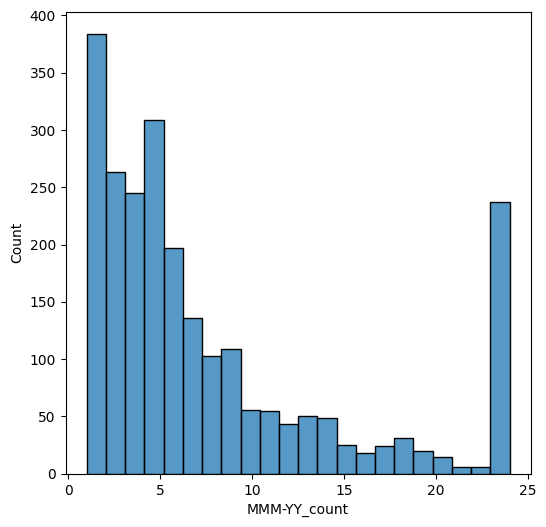

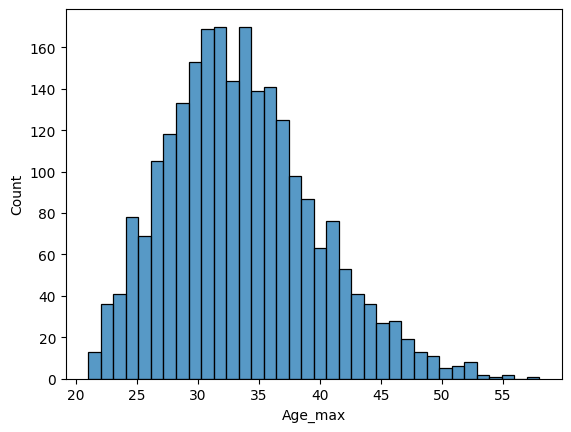

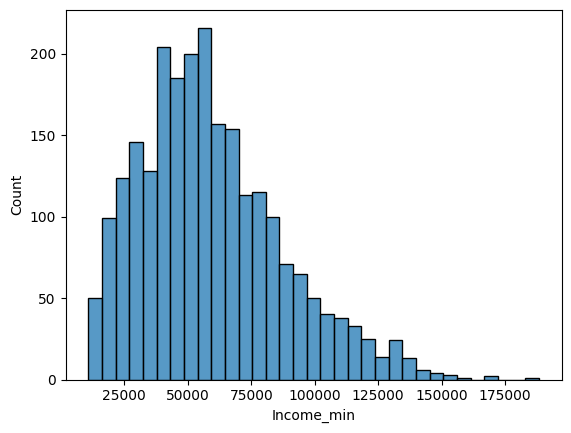

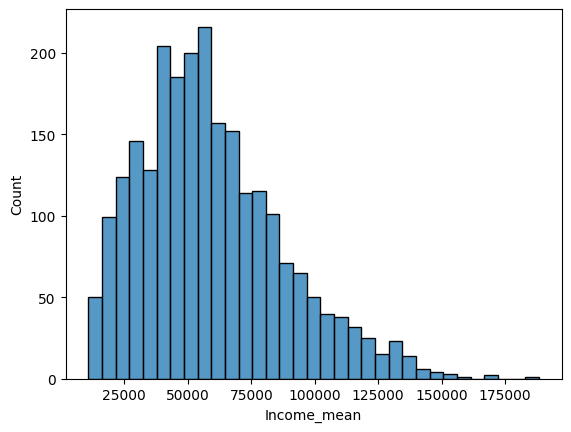

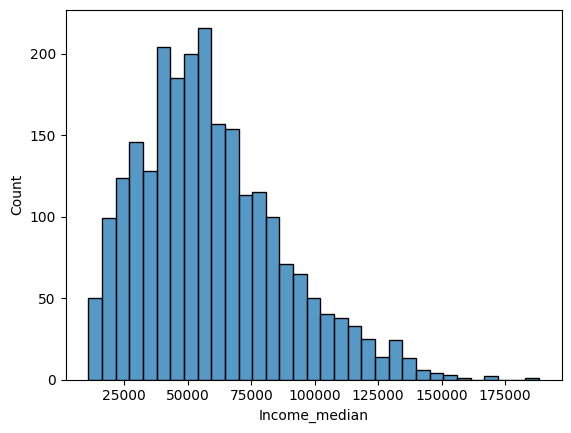

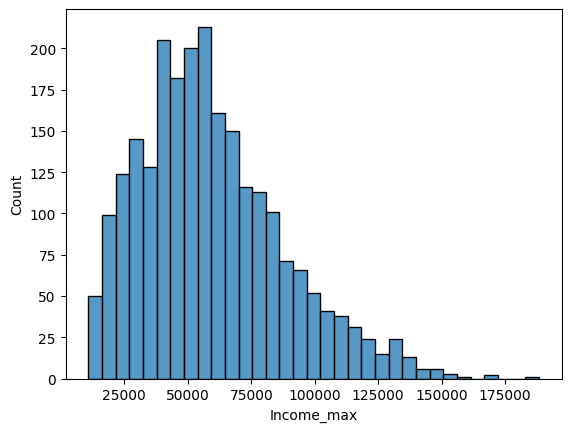

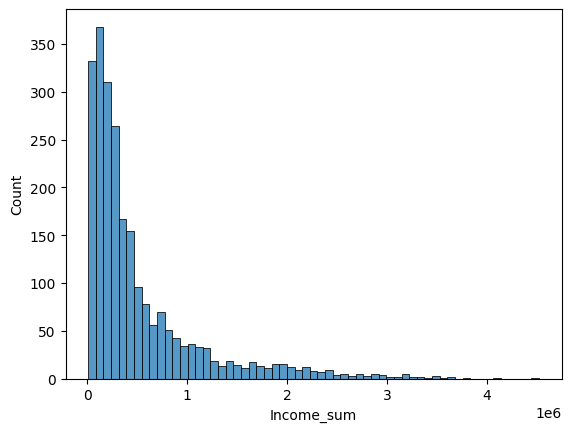

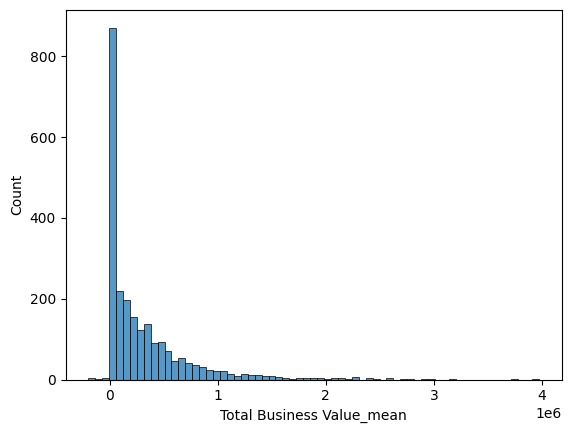

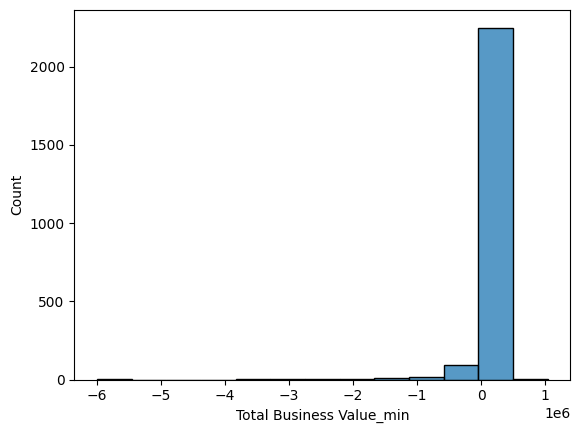

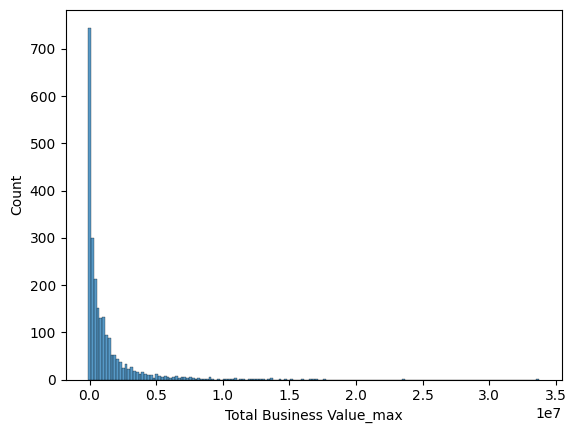

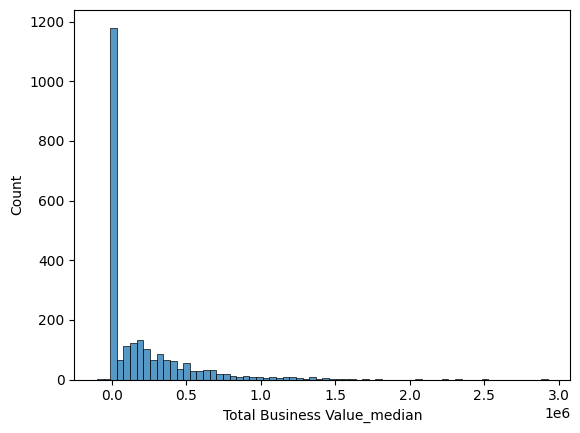

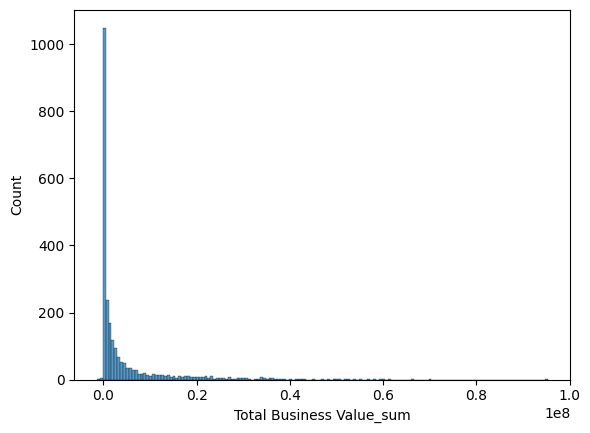

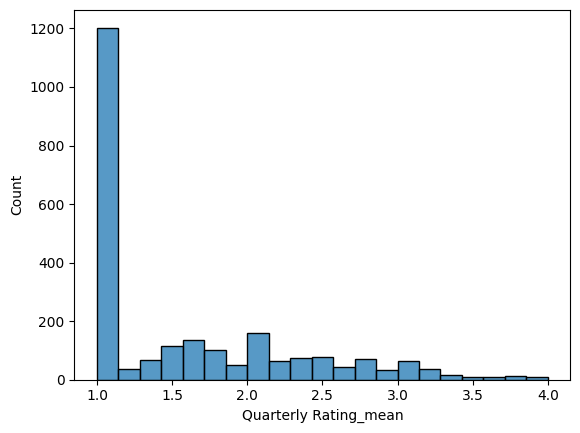

In [35]:
plt.figure(figsize=(6,6))

for col in numerical_columns:
    sns.histplot(agg[col])
    plt.show()

## Bivariate Analysis (Relationships between important variables)

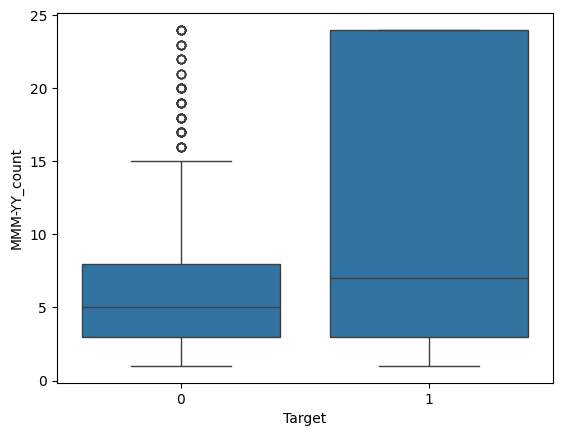

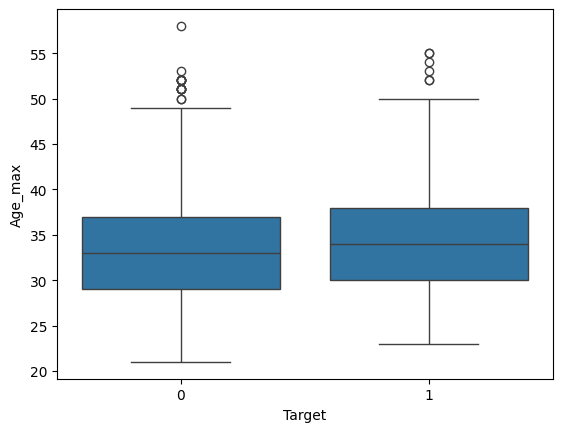

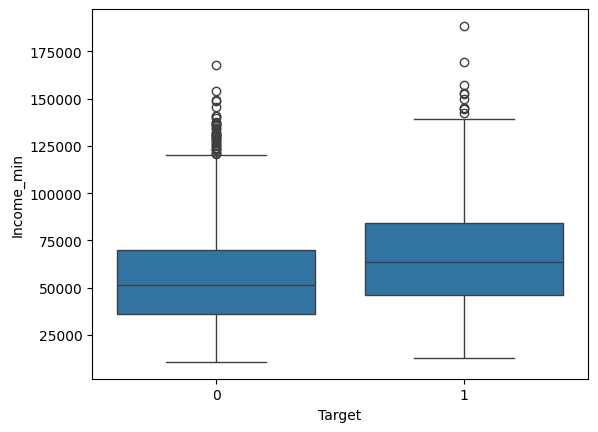

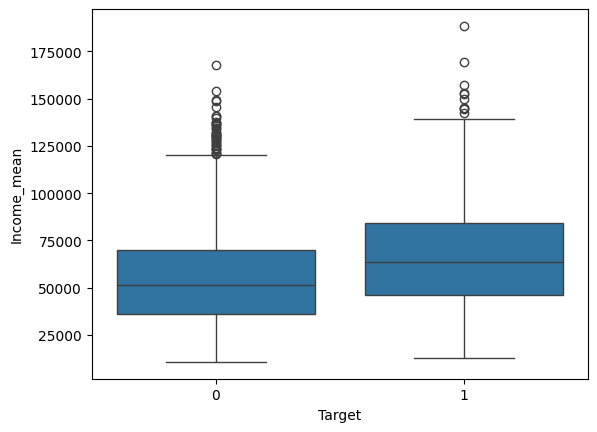

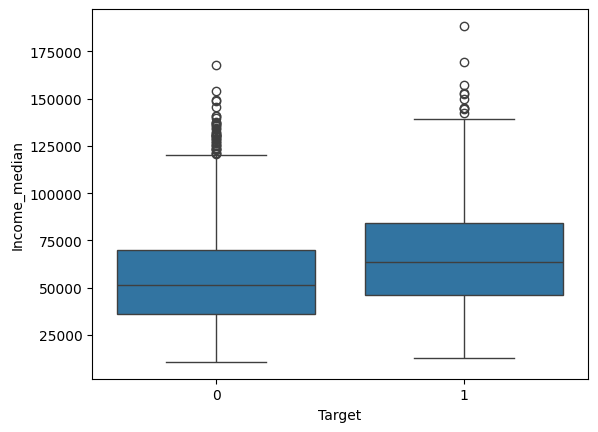

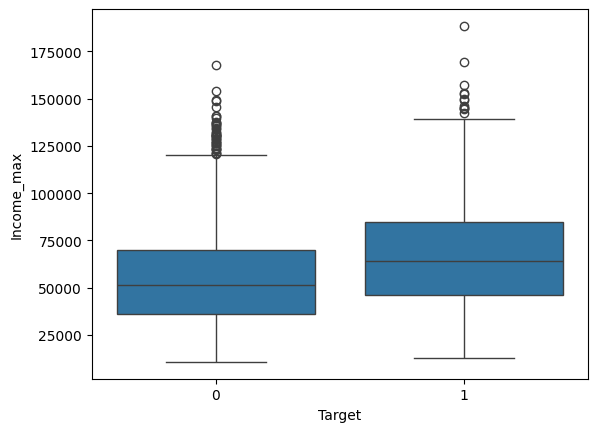

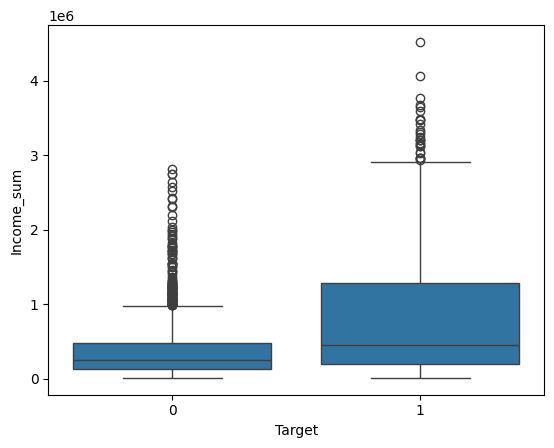

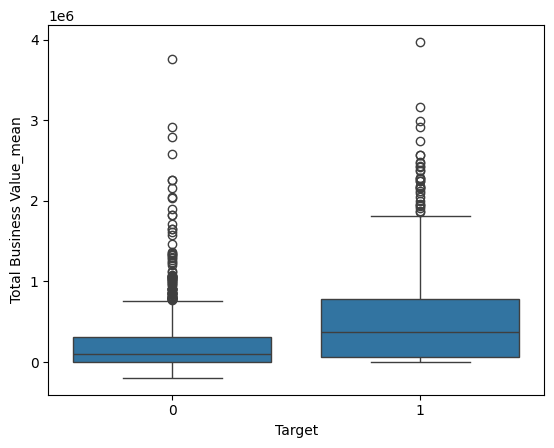

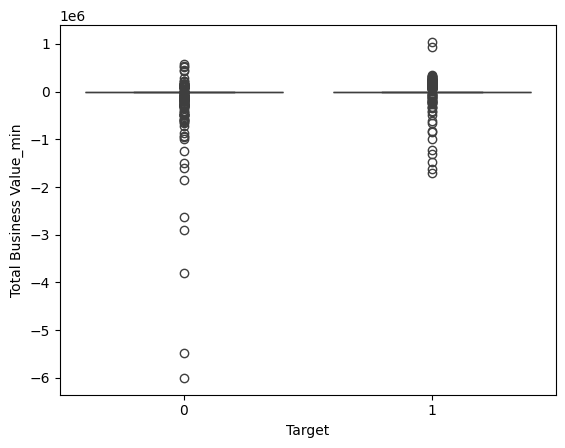

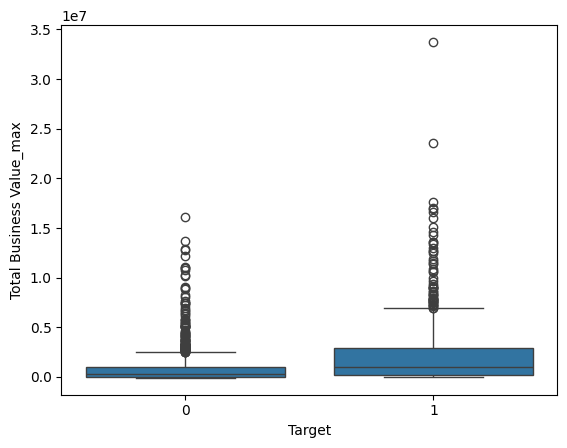

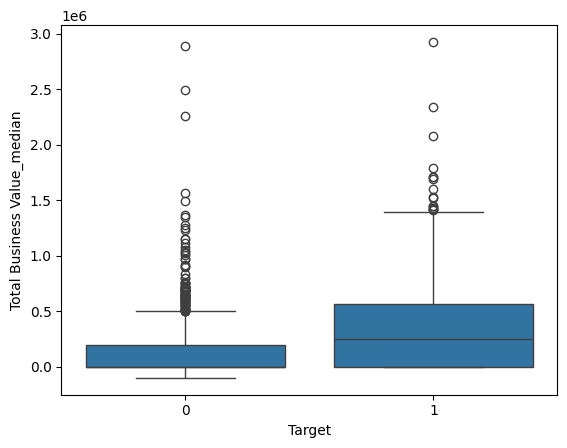

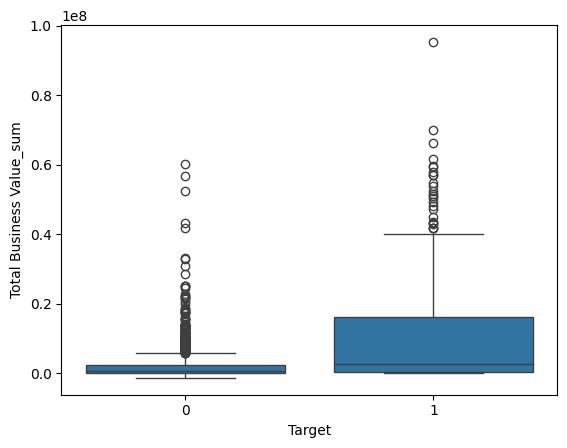

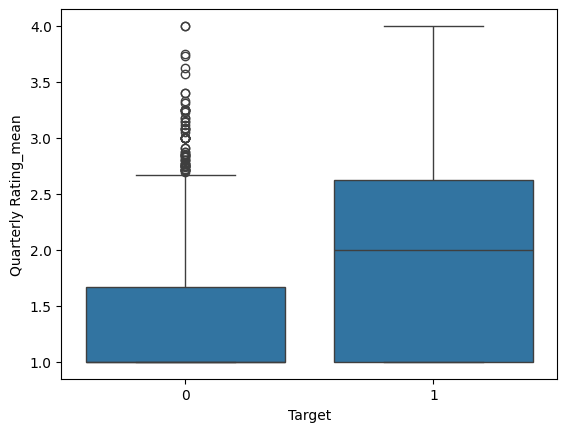

In [36]:
for col in numerical_columns:
    sns.boxplot(y = agg[col], x=agg['Target'])
    plt.show()

In [37]:
agg.columns

Index(['Driver_ID', 'MMM-YY_count', 'Age_max', 'Gender_last', 'City_last',
       'Education_Level_last', 'Income_min', 'Income_mean', 'Income_median',
       'Income_max', 'Income_sum', 'Joining Designation_first',
       'Grade_nunique', 'Grade_last', 'Total Business Value_mean',
       'Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_median', 'Total Business Value_sum',
       'Quarterly Rating_mean', 'Quarterly Rating_last',
       'Immediate_Rating_Increase', 'Last_Two_Quarters_Increase_Flag',
       'Immediate_Income_Increase', 'Target'],
      dtype='object')

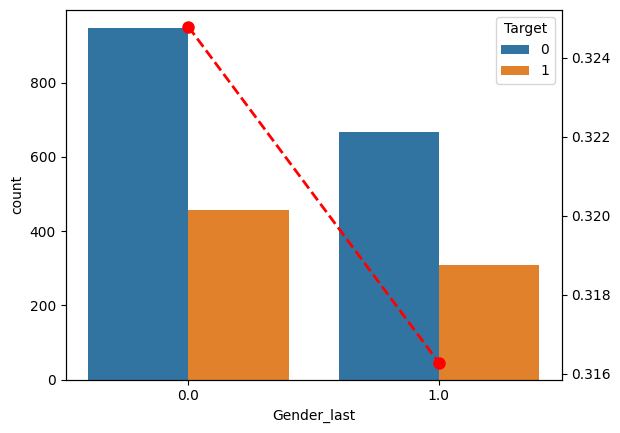

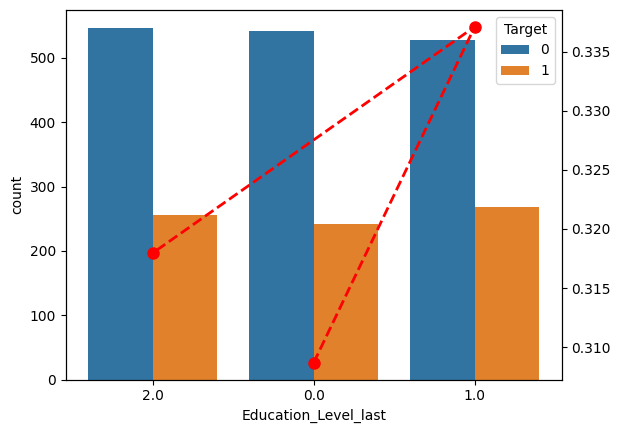

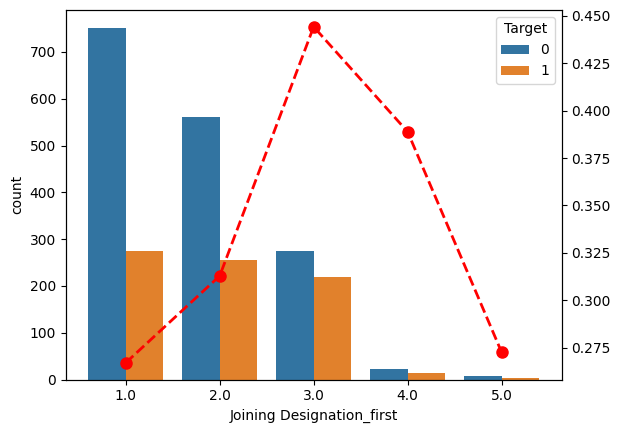

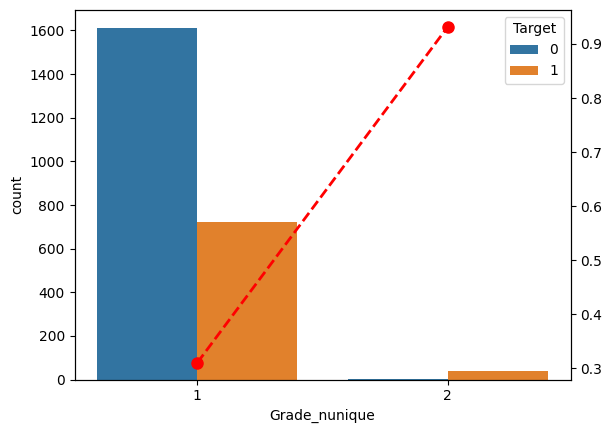

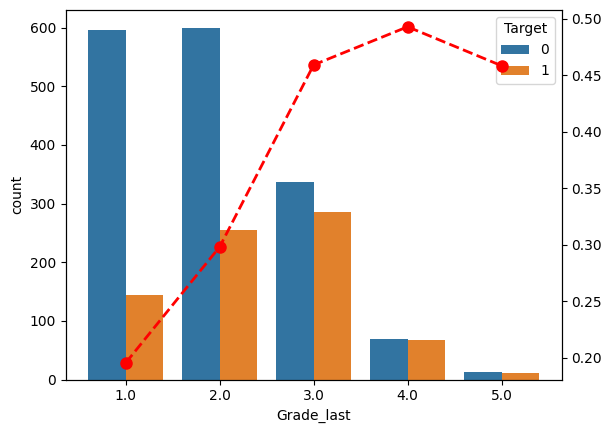

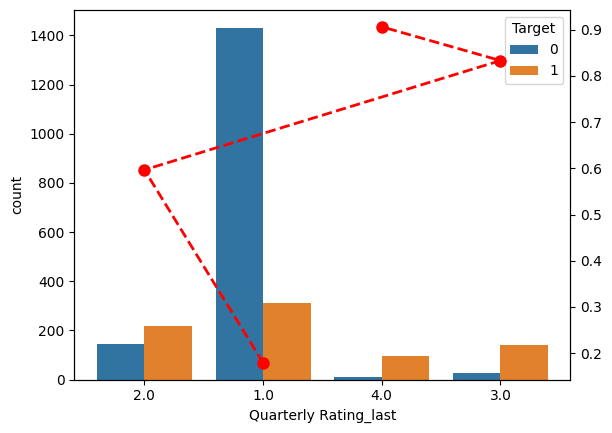

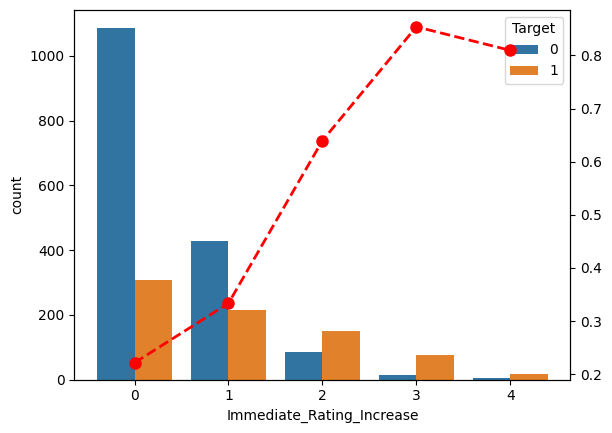

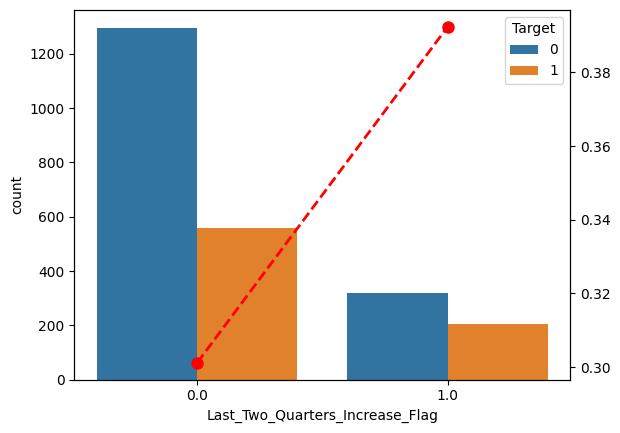

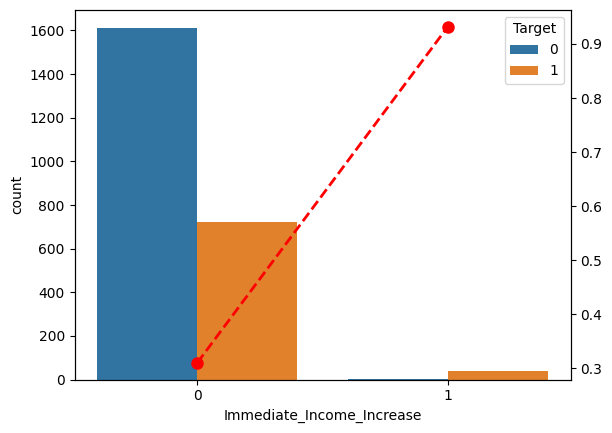

In [38]:
for col in cat_columns:
    agg[col] = agg[col].astype('str')
    ax1 = sns.countplot(agg, x=col, hue='Target')
    
    attrition_rate = (agg[agg['Target'] == 1].groupby(col).size() / agg.groupby(col).size()).reset_index()
    
    ax2 = ax1.twinx()
    ax2.plot(attrition_rate[col], attrition_rate[0], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8)
    
    plt.show()

In [39]:
agg['City_last'] = agg['City_last'].str[1:].astype(int)

<Axes: >

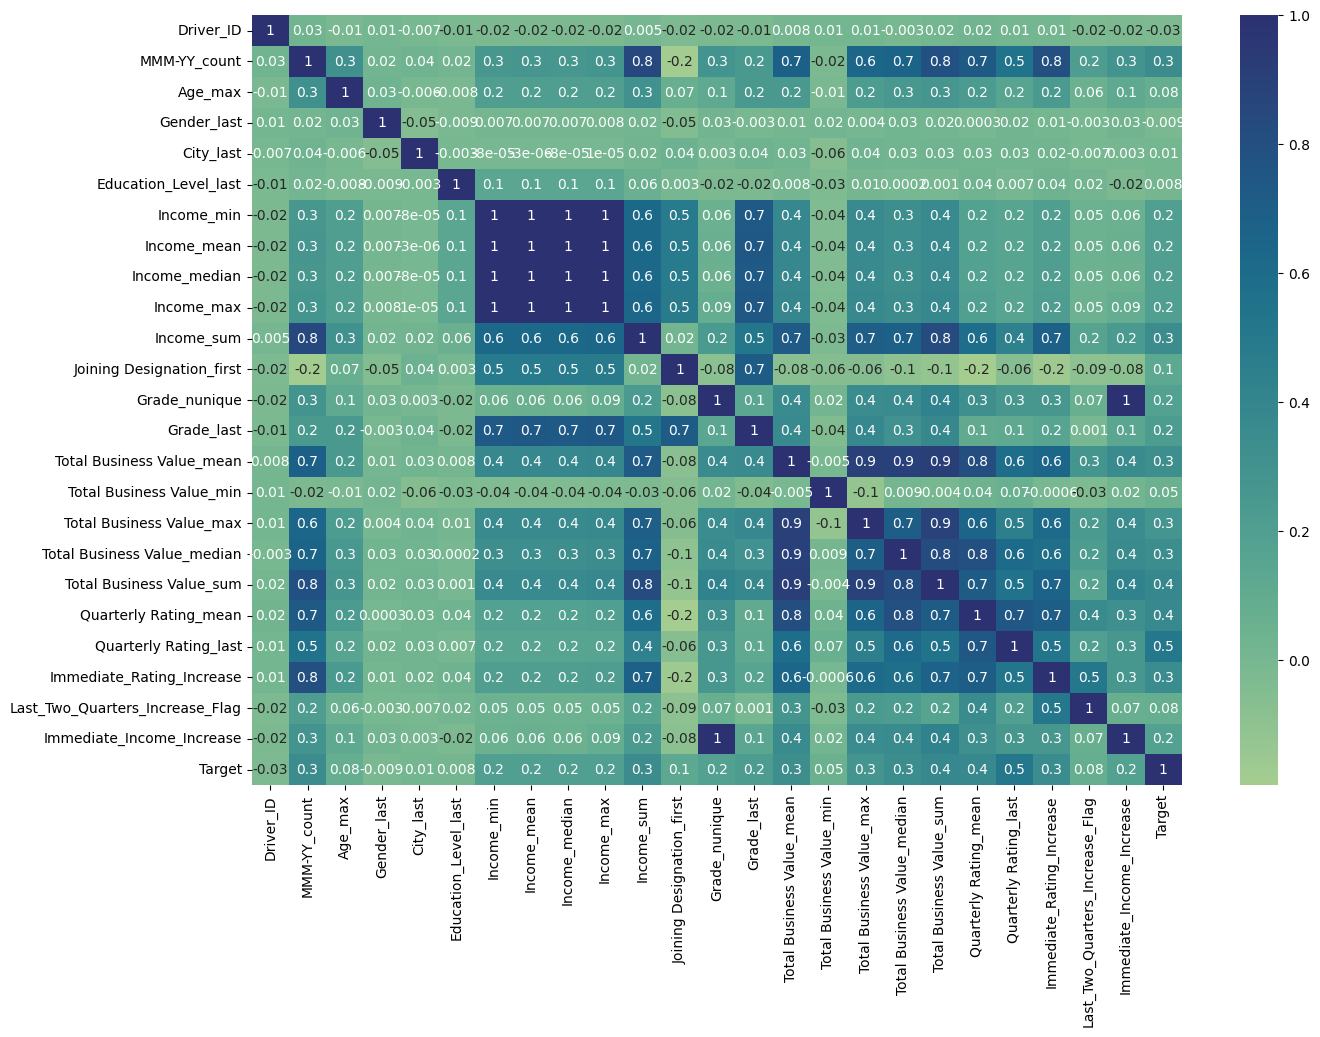

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(agg.corr(method='pearson'),annot=True,fmt='.1g',cmap="crest")

The decision dilemma in the process of selecting a model for predicting driver attrition in a cab-hailing service, it is crucial to consider trade-offs between precision and recall scores. This decision involves a strategic balance, taking into account the following considerations:

Prioritizing Precision: 
- Emphasizing precision in the model aims to minimize false positives, thereby avoiding unnecessary expenses on retention strategies for
 drivers who are not likely to leave. This approach is particularly beneficial when targeted retention initiatives are 
costly, ensuring resources are allocated judiciously. 
- Additionally, it prevents creating discomfort for drivers by avoiding premature 
assumptions about their departure.

Prioritizing Recall: 
- Alternatively, prioritizing recall focuses on minimizing false negatives, which is valuable in the context of driver 
attrition. Given that hiring new drivers is often more expensive than retaining experienced ones, reducing false negatives allows for the identification of drivers likely to leave. 
- This facilitates the implementation of proactive measures, such as competitive remuneration or engagement programs,
to retain valuable drivers and mitigate attrition effectively.

In [41]:
for col in cat_columns:
    agg[col] = agg[col].astype(float).astype(int)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [43]:
agg = agg.astype(int)
agg.drop('Driver_ID',inplace=True, axis=1)
from category_encoders import TargetEncoder
TE = TargetEncoder()
for col in cat_columns:
    agg[col] = agg[col].astype('category')
    agg[col + '_TE'] = TE.fit_transform(X = agg[col],y = agg["Target"])
for col in cat_columns:
    agg[col] = agg[col].astype(float).astype(int)

In [44]:
X = agg.drop('Target',axis=1)
y = agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [45]:
ss= StandardScaler()
ss.fit_transform(X_train)

array([[-0.89285812, -0.98349156, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.45183377,  0.02155429, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.89285812, -1.15099921, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       ...,
       [-0.30482565,  0.85909251,  1.20042727, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-1.03986624, -0.48096864, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.59884189, -0.48096864, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344]])

In [46]:
ss.transform(X_test)

array([[-0.45183377,  0.35656958, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.45183377, -1.15099921,  1.20042727, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.89285812, -0.81598392, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       ...,
       [-0.45183377, -0.81598392, -0.83303672, ..., -0.59545418,
        -0.53767976, -0.13882344],
       [-0.45183377,  0.18906193, -0.83303672, ...,  0.07598289,
         1.85984311, -0.13882344],
       [-0.01080942,  0.35656958,  1.20042727, ...,  0.07598289,
         1.85984311, -0.13882344]])

In [47]:
X_train=pd.get_dummies(X_train,columns=cat_columns,drop_first=True)
X_test=pd.get_dummies(X_test,columns=cat_columns,drop_first=True)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator, X, Y, return_times=True)
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes.legend(loc="best")
    plt.show()


In [49]:
from sklearn.model_selection import cross_validate

In [50]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.74 0.76 0.74 0.75 0.76]
Mean: 0.7509504430703099
Decision Tree: [0.769 0.792 0.763 0.775 0.744]
Mean: 0.7685842890615365
RandomForestClassifier(): [0.81 0.82 0.82 0.83 0.84]
Mean: 0.824028856825749
GradientBoostingClassifier: [0.811 0.842 0.809 0.828 0.845]
Mean: 0.8269700332963372
XGBoostClassifier: [0.74 0.76 0.74 0.75 0.76]
Mean: 0.8244410971935944


### Random Forest

In [51]:
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

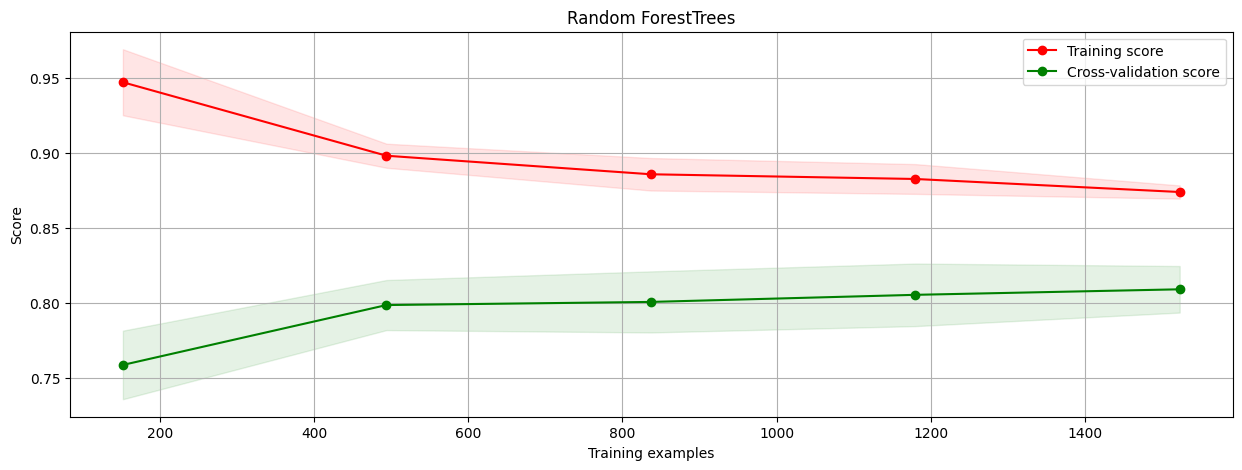

In [52]:
plot_learning_curve(rf_clf1, X_train, y_train, "Random ForestTrees")

In [53]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.8623949579831933
Test data accuracy: 0.8092243186582809
Accuracy of the model: 0.8092243186582809
ROC-AUC score test dataset:  0.8353414882772682
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       327
           1       0.79      0.54      0.64       150

    accuracy                           0.81       477
   macro avg       0.80      0.74      0.76       477
weighted avg       0.81      0.81      0.80       477

----------------------------------------------------------------------
Confusion Metrix
[[305  22]
 [ 69  81]]


In [54]:
rf_clf_imp1 = rf_clf1.feature_importances_

### XG Boosting Classifier

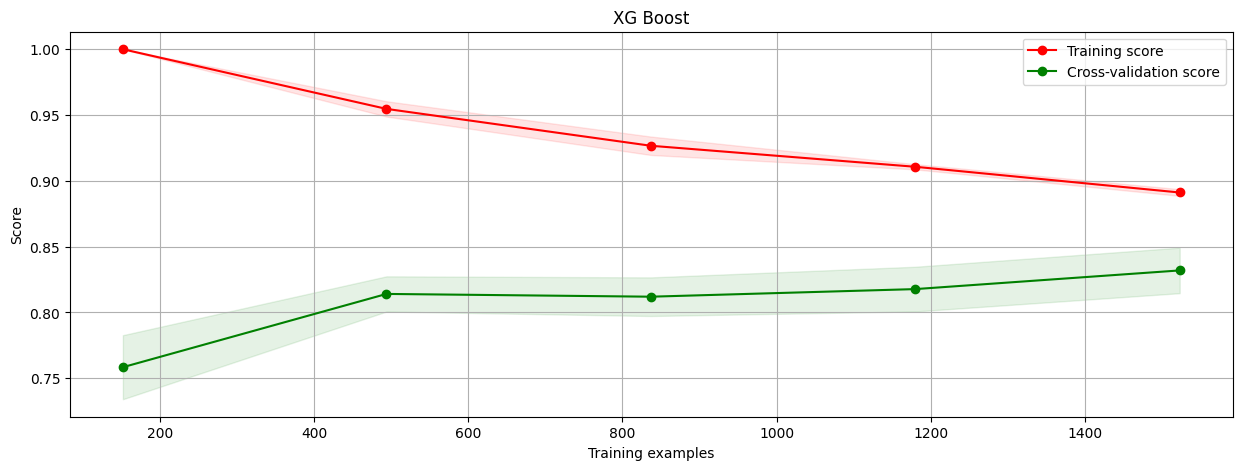

In [55]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]
plot_learning_curve(gbc1, X_train, y_train, "XG Boost")

In [56]:
gbc_clf_imp1 = gbc1.feature_importances_

In [57]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.8839285714285714
Test Score :  0.8301886792452831
Accuracy Score :  0.8301886792452831
ROC-AUC score test dataset:  0.8514780835881753
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       327
           1       0.82      0.59      0.69       150

    accuracy                           0.83       477
   macro avg       0.83      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477

------------------------------------------------------------
Confusion Matrix
[[307  20]
 [ 61  89]]
------------------------------------------------------------


## CLASS IMBALANCE TREATMENT

In [58]:
(y_train == 1).sum()/len(y_train)

0.3230042016806723

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

In [61]:
X_train_smot.shape,y_train_smot.shape

((2578, 44), (2578,))

In [62]:
X_test.shape,y_test.shape

((477, 44), (477,))

In [63]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({1: 1289, 0: 1289})


In [64]:
clf = RandomForestClassifier()
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [65]:
clf = RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='sqrt',n_estimators= 19)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

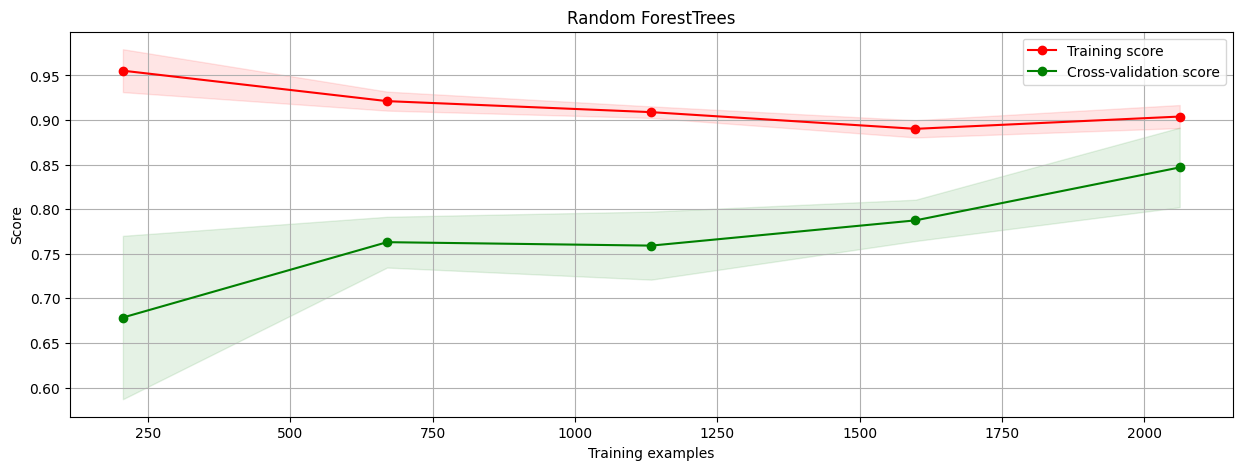

In [66]:
plot_learning_curve(clf, X_train_smot, y_train_smot, "Random ForestTrees")

In [67]:
y_pred = clf.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm3 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       327
           1       0.74      0.64      0.69       150

    accuracy                           0.82       477
   macro avg       0.79      0.77      0.78       477
weighted avg       0.81      0.82      0.81       477

----------------------------------------------------------------------
Confusion Metrix
[[293  34]
 [ 54  96]]


In [68]:
rf_clf_imp2= clf.feature_importances_

In [69]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
gbc_clf_imp2 = gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test, y_pred1))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       327
           1       0.78      0.65      0.71       150

    accuracy                           0.83       477
   macro avg       0.82      0.78      0.80       477
weighted avg       0.83      0.83      0.83       477

------------------------------------------------------------
Confusion Matrix
[[300  27]
 [ 53  97]]
------------------------------------------------------------


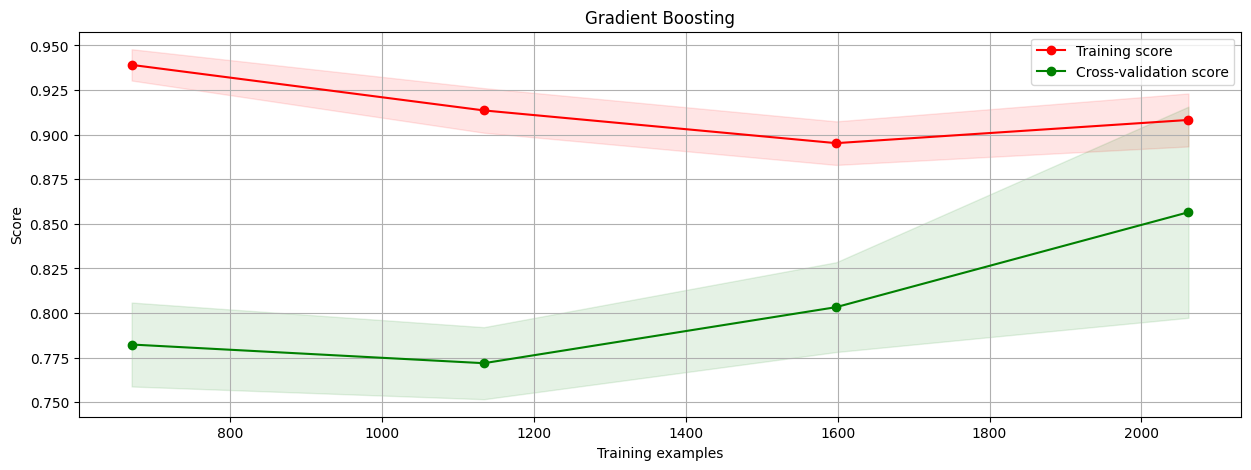

In [71]:
plot_learning_curve(gbc2, X_train_smot, y_train_smot, "Gradient Boosting")

In [72]:
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [73]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [74]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,305,22,69,81,87.018545,93.272171,81.550802
1,GradientBoosting,imbalanced,307,20,61,89,88.345324,93.883792,83.423913
2,RandomForest,balanced,293,34,54,96,86.943620,89.602446,84.438040
3,GradientBoosting,balanced,300,27,53,97,88.235294,91.743119,84.985836


In [77]:
imp = pd.DataFrame(X_train_smot.columns, columns=['Features'])
imp['importance'] = gbc_clf_imp2.round(2)
imp

,Features,importance
0,MMM-YY_count,0.11
1,Age_max,0.01
2,City_last,0.01
3,Income_min,0.00
4,Income_mean,0.00
5,Income_median,0.00
6,Income_max,0.00
7,Income_sum,0.03
8,Total Business Value_mean,0.01
9,Total Business Value_min,0.00


**Workforce Insights:**

- Gender distribution: 57% male employees, 43% female employees.

- Similar educational levels for levels 1 & 2.

- 97.3% of employees did not receive a raise.

- Joining percentages: 43% at level 1, 34% at level 2, 20% at level 3, and below 2% at higher levels.

- Current designation distribution: 35% at level 2, 31% at level 1, 26% at level 3, less than 5% at higher designations.

- Promotion rates: 54.6% received, 45.4% did not; only 2.6% received a raise.

- Employee numbers and reportings increased with each year.

- Majority associated with city C20.

- Scatter plot trends: Income increases with age but subtly declines after 45-50. Total Business Value increases with age but declines after 45.

- Income decreases with higher designation (about 4% at higher designations).

- Median income higher for employees with higher grades.

- Income distribution changes by 3-5% with different education levels.

- Joining designation increases with higher grades.

- Top reporting day is on the 24th day.

- Approximately 55% of employee reportings have Quarterly Rating 1.

- Reportings increase with higher income and Total Business Value.

**Data Imbalance Treatment Impact:**

- Recall improved post-treatment, performing better in Gradient Boosting.

- Precision decreased after treatment but is better in Random Forest.

- F1_score increased after balancing data, especially in Gradient Boosting.


# Recommendations
1. Retention Strategies:
Focus on Existing Drivers: Invest in programs and incentives to retain existing drivers, as acquiring new ones is more expensive. Recognize and reward loyalty to the platform.
Targeted Incentives: Analyze historical data to identify drivers at risk of churning. Provide targeted incentives, such as bonuses or rewards, to those drivers who have shown signs of potential attrition.
Regular Feedback: Establish a feedback system for drivers to address their concerns and improve satisfaction. Regularly communicate with drivers to understand their needs and challenges.

2. Performance Recognition:
Promotion and Raise Programs: Develop programs that recognize and reward high-performing drivers with promotions and raises. This can boost morale and motivation.
Education and Training: Offer training programs to enhance driver skills and performance, contributing to their overall success on the platform.

3. Income and Business Value:
Refine Income Structure: Consider revising the income structure, especially for higher designations, to align it with market trends and driver expectations. This may involve offering more competitive rates for experienced drivers.
Optimize Business Value: Provide tools and support to help drivers optimize their business value. This can include data-driven insights on peak hours, high-demand areas, and strategies for maximizing earnings.
